In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as cf
import pandas as pd

In [38]:
def getData(M,I):
            
    mass,intensity=[],[]
    for i in M:
        try:
            mass.append(int(i.replace(',00','')))
        except ValueError:
            continue

    for i in I:
        try:
            value=float(i.replace(',','.'))
            if value>.005:
                continue
            intensity.append(value)
        except ValueError:
            continue  
    
    return mass,intensity

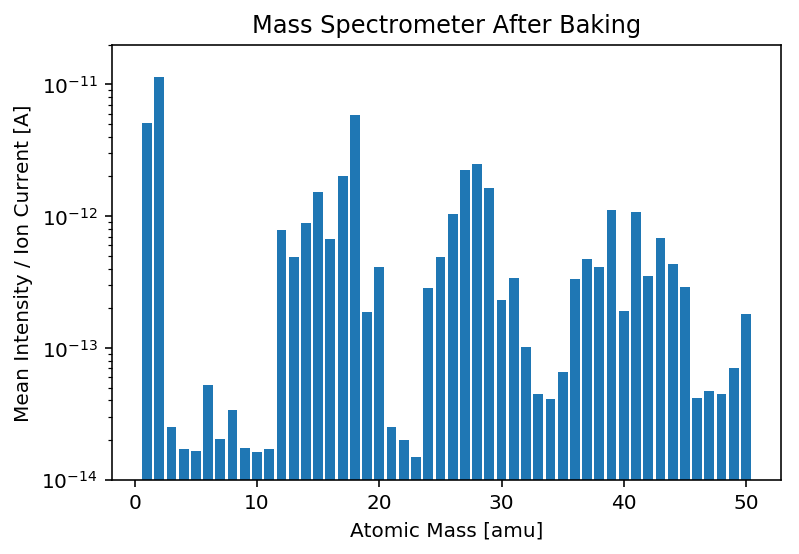

In [113]:
data=[]
data.append( pd.read_csv("20180307_JonasLehnenGuntherTuerk/20180308 101236 Faraday Bargraph Cycles AfterBaking.asc",
                         delimiter="\t",skiprows=0 ))

for entry in data:
    M= entry.values[:,0]
    I= entry.values[:,1]

mass,intensity=getData(M,I)

fig,ax=plt.subplots(dpi=144)

i1=intensity[:50]
i2=intensity[50:100]
i3=intensity[100:150]

meanI= [sum(x)/3 for x in zip(i1,i2)]

ax.bar(mass[:50],meanI,log=True)
ax.set(ylim=[1e-14,2e-11], xlabel="Atomic Mass [amu]", ylabeL="Mean Intensity / Ion Current [A]",
      title="Mass Spectrometer After Baking")
fig.savefig("Plots/MSafter")